# Decision Trees example
Supervised Learing method for classification or regression. Based on simple decision rules inferred from the data features.

In [1]:
# import libraries
# handle data
import numpy as np
import pandas as pd

# obtain a dataset
from sklearn.datasets import load_iris

# import model (decision trees)
from sklearn import tree

# visualization
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
# Obtain the dataset
iris_data = load_iris()

In [4]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df["class"] =  iris_data.target

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_df.shape

(150, 5)

In [7]:
# We obtain the independant variables and the prediction one
X = iris_df.drop("class", axis=1)
y = iris_df["class"]


# Instance of the decision tree classifier
tree_clf = tree.DecisionTreeClassifier()

# Fitting of the data
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<IPython.core.display.Javascript object>


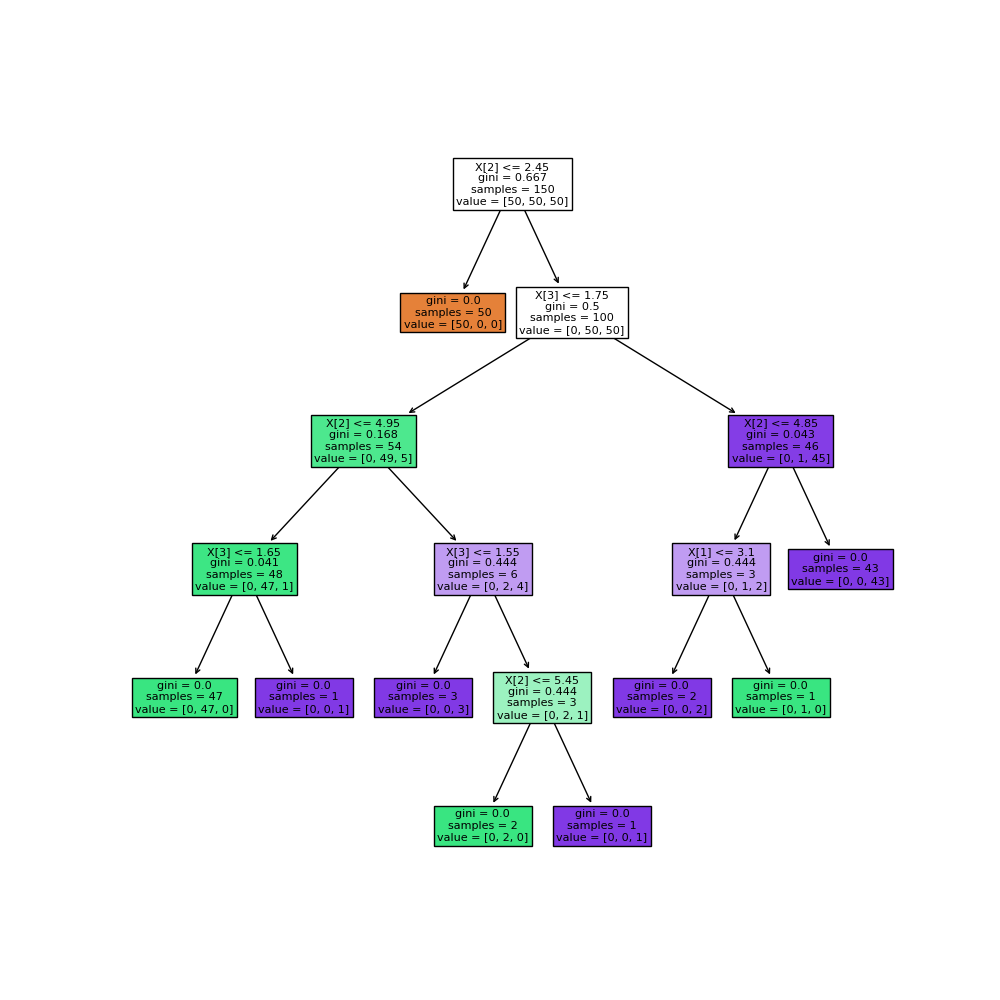

In [8]:
# See the decision tree generated
plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf, filled=True)
plt.show()

In [9]:
# Textual visualization
print(tree.export.export_text(tree_clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



<IPython.core.display.Javascript object>


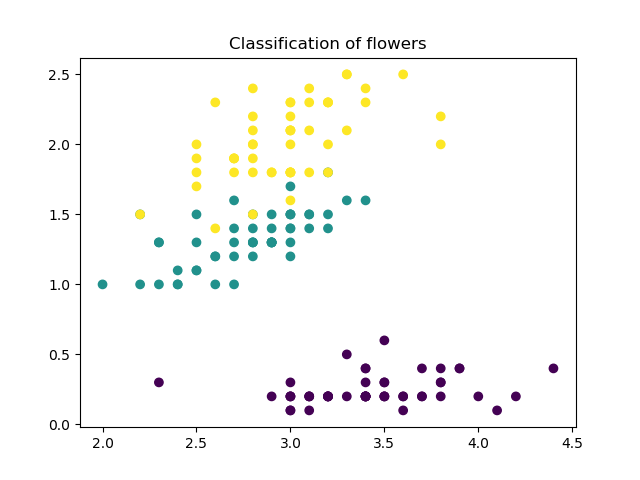

In [10]:
plt.figure()
plt.scatter(x=iris_df["sepal width (cm)"], y=iris_df["petal width (cm)"], c=tree_clf.predict(X))
plt.title("Classification of flowers")
plt.show()